In [87]:
# Importing Dependencies 
import numpy as np
import pandas as pd
import librosa 

import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.io import wavfile

int16


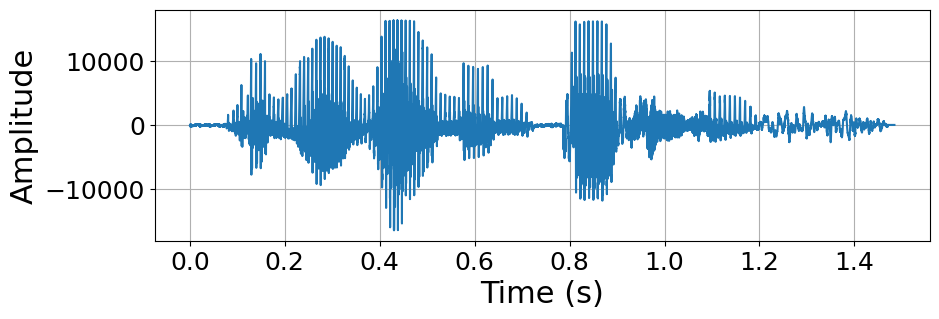

In [88]:
path_audio = 'data/audios_development/10.wav'
sr, audio_wav = wavfile.read(path_audio)
print(audio_wav.dtype)
audio_wav_mono = audio_wav.sum(axis=1)/2

mpl.rcParams["font.size"] = 18

fig, ax = plt.subplots(1, figsize=(10,3))

v = audio_wav_mono

time = np.arange(v.size)/sr
ax.plot(time, v)
ax.grid(visible=True)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax.set_xlabel('Time (s)', fontsize=22)
ax.set_ylabel('Amplitude', fontsize=22)
plt.xticks(fontsize=18, color='black')
plt.yticks(fontsize=18, color='black')
plt.show()
fig.savefig("figs/audio_track.pdf", bbox_inches="tight")

In [89]:
from utils import audio_preprocessing as ap

input_file = "data/audios_development/9.wav"
def plot_audio(y, sr=22050, c='b', s=False, ax=None, title='Audio Signal'):
    if ax == None:
        fig, ax = plt.subplots(1, figsize=(10,3))
    if s:
        ax.plot(np.arange(y.size)/sr, y, c=c)
    else:
        ax.plot(y, c=c)
    ax.title.set_text(title)
    return ax

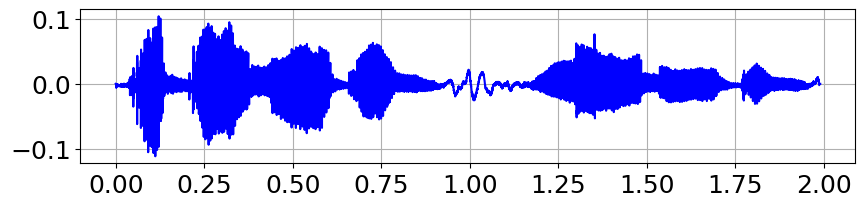

In [90]:
y, sr = librosa.load(input_file)
fig, ax = plt.subplots(1, figsize=(10,2))
ax.grid(visible=True)
# plot_audio(y, c='orange', s=True, ax=ax, title = 'Original Audio')
plot_audio(y, c='blue', s=True, ax=ax, title = '')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.xticks(fontsize=18, color='black')
plt.yticks(fontsize=18, color='black')
plt.show()
fig.savefig("figs/audio_track_original.pdf", bbox_inches="tight")

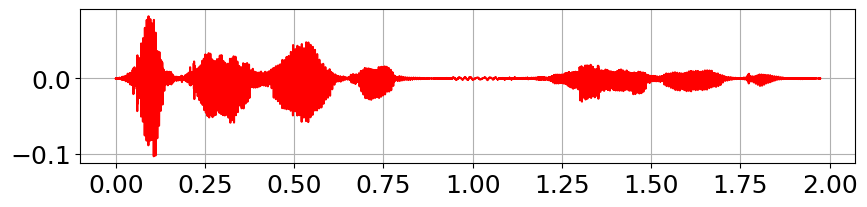

In [104]:
y_noise = ap.reduce_noise(y=y, sr=sr)
y_filter = ap.bandpass_filter(y=y_noise, sr=sr)

fig, ax = plt.subplots(1, figsize=(10,2))
ax.grid(visible=True)
# plot_audio(y_filter, c='red', s=True, ax=ax, title = 'Filtered Audio')
plot_audio(y_filter, c='red', s=True, ax=ax, title = '')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.xticks(fontsize=18, color='black')
plt.yticks(fontsize=18, color='black')
plt.show()
fig.savefig("figs/audio_track_filtered.pdf", bbox_inches="tight")

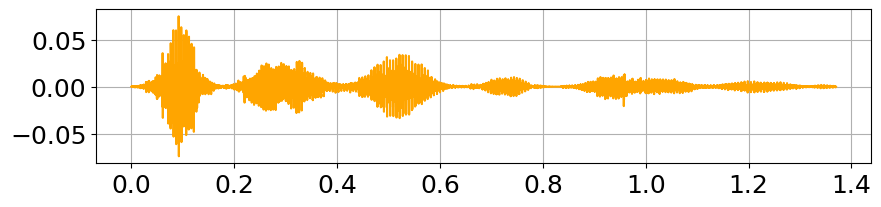

In [92]:
y_processed = ap.process_audio(y=y_filter, sr=sr, top_db=20)

fig, ax = plt.subplots(1, figsize=(10,2))
# plot_audio(y_processed, c='orange', s=True, ax=ax, title = 'Processed Audio')
plot_audio(y_processed, c='orange', s=True, ax=ax, title = '')
ax.grid(visible=True)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.xticks(fontsize=18, color='black')
plt.yticks(fontsize=18, color='black')
plt.show()
fig.savefig("figs/audio_track_processed.pdf", bbox_inches="tight")